### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
store_data = pd.read_csv("./data/store.csv")
sales_data = pd.read_csv("./data/train.csv")

/Users/corstiaen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
print(f"Number of samples in entire dataset: {len(sales_data)}")
sales_data.head()

Number of samples in entire dataset: 637774


,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [4]:
print(f"Length of store-table: {len(store_data)}")
store_data.head()

Length of store-table: 1115


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
# Drop all rows that have no sales data
sales_data.dropna(subset=["Sales"], inplace=True)

In [6]:
# Drop the customers feature, we do not know that number for
# future days and is directly linked to the target, i.e., Sales
sales_data.drop("Customers", axis=1, inplace=True)

In [7]:
keep_mask = sales_data.loc[:, "Sales"] != 0
sales_data = sales_data[keep_mask]

In [8]:
# removing duplicats
duped_mask = sales_data.duplicated()
duplicated_data = sales_data.loc[duped_mask, :]
print(len(duplicated_data))
duplicated_data.head()

30


,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
17319,2013-01-16,NaN,3.0,2795.0,1.0,0.0,0,0.0
43383,2013-02-08,NaN,5.0,5706.0,1.0,1.0,0,0.0
79395,2013-03-13,NaN,3.0,4907.0,1.0,0.0,0,0.0
83406,2013-03-16,NaN,6.0,4648.0,1.0,0.0,0,0.0
122096,2013-04-20,NaN,6.0,2890.0,1.0,0.0,0,0.0


## Needs work
It is not clear that we can just drop the duplicates. It is possible that they are real data, so what is tha chance of finding the exact same sales on a day for 600 days? However, it is only ~2000 samples out of ~600000, so we can drop them for now. Maybe look into this more at a later time.

In [9]:
sales_data.loc[:, "Store"].nunique()

1115

In [10]:
duplicated_data.loc[:, "Sales"].unique()

array([ 2795.,  5706.,  4907.,  4648.,  2890.,  3704.,  4621.,  3995.,
       12348.,  7156.,  7144.,  8074.,  7167.,  7164.,  4210.,  6908.,
        4320.,  6398.,  4579.,  5295.,  5328.,  4940.,  6174.,  3277.,
        7620.,  6576.,  5222.,  7946.,  5388., 13183.])

In [11]:
sales_data.loc[:, "Store"].isnull().sum()

15580

In [12]:
len(sales_data)

512956

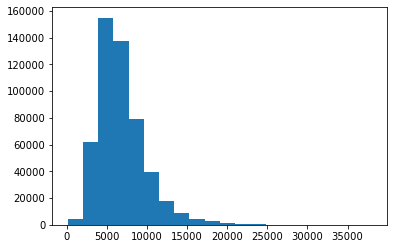

In [13]:
plt.hist(sales_data.loc[:, "Sales"], bins=20)
plt.show()

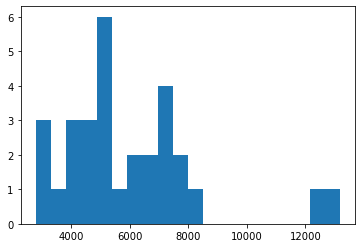

In [14]:
mydata = duplicated_data.loc[duplicated_data.loc[:, "Sales"]!=0., :]
plt.hist(mydata.loc[:, "Sales"], bins=20)
plt.show()

In [15]:
sales_data.drop_duplicates(inplace=True)

### Merging sales and store data

We need to merge the sales data with the store data. Cheacking data types reveals that the feature on which we will merge, "Store", is not of the same type. We change the datatype of "Store" in the sales data, such that it matches the store data. We do this step manually here, but this step will also be included in our pipeline.

In [16]:
sales_data.dtypes

Date              object
Store            float64
DayOfWeek        float64
Sales            float64
Open             float64
Promo            float64
StateHoliday      object
SchoolHoliday    float64
dtype: object

In [17]:
store_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

There's NaNs in the store ID. We will encode them with 0, because that label does not exist for a store in the store data.

In [18]:
store_data.loc[:, "Store"].min()

1

In [19]:
sales_data = sales_data.fillna({"Store": 0})

In [20]:
sales_data = sales_data.astype({"Store": int})

In [21]:
merged_data = sales_data.merge(store_data, how="left", on="Store")

In [22]:
merged_data.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,353,2.0,3139.0,1.0,0.0,a,1.0,b,b,900.0,NaN,NaN,1.0,14.0,2013.0,"Feb,May,Aug,Nov"
1,2013-01-01,335,2.0,2401.0,1.0,0.0,a,1.0,b,a,90.0,NaN,NaN,1.0,31.0,2013.0,"Jan,Apr,Jul,Oct"
2,2013-01-01,512,2.0,2646.0,1.0,0.0,a,1.0,b,b,590.0,NaN,NaN,1.0,5.0,2013.0,"Mar,Jun,Sept,Dec"
3,2013-01-01,494,2.0,3113.0,1.0,0.0,a,1.0,b,a,1260.0,6.0,2011.0,0.0,NaN,NaN,NaN
4,2013-01-01,530,2.0,2907.0,1.0,0.0,a,1.0,a,c,18160.0,NaN,NaN,0.0,NaN,NaN,NaN


In [23]:
len(merged_data)

512926

### Splitting train, validation, and test sets

When using tree-based models we can use random splitting of the data:

In [24]:
X = merged_data.loc[:, ~merged_data.columns.isin(["Sales"])]
y = merged_data.loc[:, "Sales"]

X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    X, y,
    random_state=42,
    train_size=.8,
)

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_valid,
    y_train_valid,
    random_state=42,
    train_size=.8,
)

When using trend+seasonality based models we need to split the data using a date-cutoff. This may be implemented later.

In [25]:
X_train.head()

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
143140,2013-06-12,353,3.0,1.0,0.0,0,0.0,b,b,900.0,NaN,NaN,1.0,14.0,2013.0,"Feb,May,Aug,Nov"
494300,2014-07-08,267,2.0,1.0,0.0,0,0.0,c,a,2460.0,1.0,2012.0,0.0,NaN,NaN,NaN
417249,2014-04-08,734,2.0,1.0,0.0,0.0,0.0,a,a,220.0,NaN,NaN,1.0,36.0,2013.0,"Mar,Jun,Sept,Dec"
370025,2014-02-17,0,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249373,2013-10-05,510,NaN,1.0,NaN,0,0.0,a,c,8260.0,NaN,NaN,0.0,NaN,NaN,NaN


In [26]:
len(X_train)

328272

In [27]:
len(X_test)

102586

In [28]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(X_train)
# profile.to_file(output_file="rossman_profile_report.html")

### Feature engineering

>Check amount of features missing per sample. If 4 or more, meaning about 50%, try dropping entire row.

>We also need to look into outliers!

**Lilla**

    Date -> datetime
    split in year, month, week, day of week; drop the original
    make sure weekday matches weekday from date; check for missing values and impute where necessary
    encode all except year with sine+cosine! https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

    DayOfWeek
    drop, replace with values derived from Date

    CompetitionDistance -> float
    Try: median imputation
    Try also: KNNImputer (sklearn)

**Corstiaen**

    Store
    3 options:
    * drop
    * target encoding -> float
    * frequency encoding -> int
    test model to seae what works best
    MAKE SURE STORE FEATURE IS SAME dTYPE!!

    Open -> one-hot encode
    3 categories, meaning 2 one-hot columns
    
    Promo -> one-hot encode
    3 categories, meaning 2 one-hot columns
    
    StateHoliday -> one-hot encode
    5 categories, meaning 4 one-hot columns
    turn 0.0 into 0
    ['0', 0.0, 'c', nan, 'a', 'b']
    
    SchoolHoliday -> one-hot encode
    3 categories, meaning 2 one-hot columns
    
    StoreType -> label encode
    Try label encoding first
    Potentially try 5 categories, meaning 4 one-hot columns
    
    Assortment -> label encode
    Try label encoding first
    Potentially try 4 categories, meaning 3 one-hot columns
    
    
**SAM**

    CompetitionOpenSinceMonth -> new int or float
    CompetitionOpenSinceYear -> new int or float
    Merge and create new feature, giving temporal distance from 2015-07-31 or 2015-08-31
    potentially use datetime for these calculations?
    Try: median imputation
    Try also: KNNImputer (sklearn)
    
    Promo2 -> one-hot encode
    3 categories including NaN, 2 columns
    make sure all missing in other Promo2 features are described by these three categories!
    
    Promo2SinceWeek -> new int or float
    Promo2SinceYear -> new int or float
    Merge and create new feature, giving temporal distance from 2015-07-31 or 2015-08-31
    potentially use datetime for these calculations?
    imputation with any value, this is caught by the boolean from Promo2 feature
    
    PromoInterval -> one-hot encode
    3 categories, NaNs can be added to the mode category, these will again be described by the Promo2 feature
    

In [31]:
class StoreTargetMeanEncoder():
    
    def __init__(self):
        self.store_target_mean = None
    
    def fit(self, X, y):
        self._get_store_target_mean(feature=X, target=y)

    def transform(self, X):
        X = self._store_target_mean_encoder(X)
        return X
    
    def fit_transform(self, X, y):
        self.fit(X, y)
        self.transform(X)
        return X
    
    def _get_store_target_mean(self, feature, target):
        all_data = pd.concat([X_train, y_train], axis=1)
        self.store_target_mean = all_data.groupby(by="Store").mean().loc[:, "Sales"].to_dict()
    
    def _store_target_mean_encoder(self, X):
        updated_store = X.loc[:, "Store"].map(self.store_target_mean)
        X_out = X.copy()
        X_out.update(updated_store)
        return X_out

In [32]:
stme = StoreTargetMeanEncoder()
stme.fit(X_train, y_train)
stme.transform(X_train)

,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
143140,2013-06-12,5246.762611,3.0,1.0,0.0,0,0.0,b,b,900.0,NaN,NaN,1.0,14.0,2013.0,"Feb,May,Aug,Nov"
494300,2014-07-08,9239.233333,2.0,1.0,0.0,0,0.0,c,a,2460.0,1.0,2012.0,0.0,NaN,NaN,NaN
417249,2014-04-08,6177.545763,2.0,1.0,0.0,0.0,0.0,a,a,220.0,NaN,NaN,1.0,36.0,2013.0,"Mar,Jun,Sept,Dec"
370025,2014-02-17,6829.229353,1.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249373,2013-10-05,8247.833922,NaN,1.0,NaN,0,0.0,a,c,8260.0,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158668,2013-06-28,5322.539286,5.0,1.0,0.0,0,0.0,d,a,9710.0,2.0,2014.0,0.0,NaN,NaN,NaN
254962,2013-10-11,6829.229353,5.0,1.0,1.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421119,2014-04-12,4317.639610,6.0,1.0,0.0,0.0,0.0,a,c,12480.0,3.0,2011.0,0.0,NaN,NaN,NaN
39908,2013-02-14,10063.844203,4.0,1.0,0.0,0,0.0,a,a,2260.0,NaN,NaN,0.0,NaN,NaN,NaN
